In [1]:
import onnxruntime
import torch
from matplotlib import pyplot as plt
from torch.utils import data

from ImageData import ImageData

In [3]:
dataset = ImageData('samples')
data_loader = data.DataLoader(dataset=dataset, batch_size=1, shuffle=False, num_workers=2)

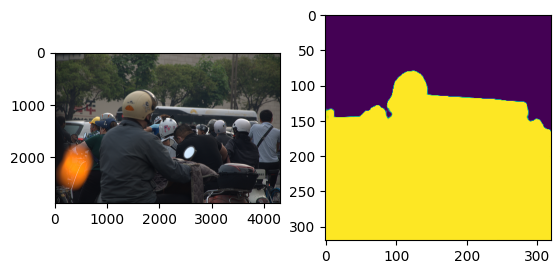

In [4]:
if __name__ == "__main__":
	_, img, x = next(iter(data_loader))
	x = x.cpu().numpy()

	session = onnxruntime.InferenceSession("checkpoints/D-DFFNet.onnx")
	y = session.run(None, {"l_x_": x})

	y = y[0].squeeze(0)
	y = y.transpose(1, 2, 0)

	fig, axs = plt.subplots(1, 2)
	axs[0].imshow(img[0])
	axs[1].imshow(y)
	plt.show()